In [1]:
import pandas as pd
import numpy as np
from tempfile import NamedTemporaryFile
import os
from IPython.display import Audio
import soundfile as sf
import librosa
import torch
import matplotlib.pyplot as plt
import librosa.display
import torchaudio
import warnings
import matplotlib.cbook
from torchaudio.transforms import Spectrogram, MelSpectrogram
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from deepspeech_pytorch.loader.data_loader import SpectrogramDataset
import json

In [2]:
df = pd.read_csv('../manifests/train_manifest.csv')
df.columns=['audio', 'text']

test_df = pd.read_csv("../manifests/test_16k_manifest.csv")
test_df.columns=['audio', 'text']

In [3]:
with open('../labels.json') as f:
    labels = json.load(f)

In [4]:
dataset = SpectrogramDataset(
    manifest_filepath='../manifests/train_manifest.csv',
    labels=labels,
    specaug_rate=1,
    specaug_policy=1,
    time_mask=70,
    freq_mask=25,
    validation=False
)

val_dataset = SpectrogramDataset(
    manifest_filepath='../manifests/train_manifest.csv',
    labels=labels,
    specaug_rate=1,
    specaug_policy=3,
    time_mask=70,
    freq_mask=15,
    validation=True
)

In [14]:
reverse_label_map = {k:v for k,v in enumerate(dataset.labels_map)}

In [31]:
def visualize_spectrogram(dataset, val_dataset, index):
    fig = plt.figure(figsize=(25, 6))
    sample = dataset[index]
    val_sample = val_dataset[index]
    mel_spectrogram = sample[0]
    val_mel_spectrogram = val_sample[0]
    
    fig.suptitle("".join([reverse_label_map[l] for l in dataset[index][1]]), fontsize=14)
    
    fig.add_subplot(221)
    plt.title('with augmentation')
    plt.set_cmap('twilight')
    plt.imshow(mel_spectrogram[0, :, :].numpy())
    
    fig.add_subplot(222)
    plt.title('without')
    plt.imshow(val_mel_spectrogram[0, :, :].numpy())

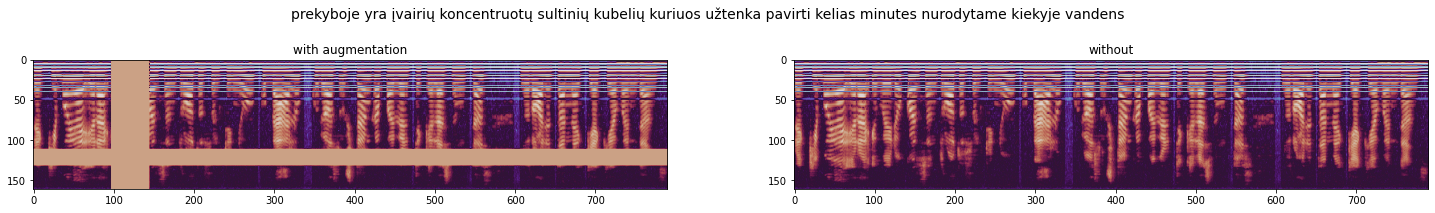

In [32]:
idx = 10
visualize_spectrogram(dataset, val_dataset, idx);

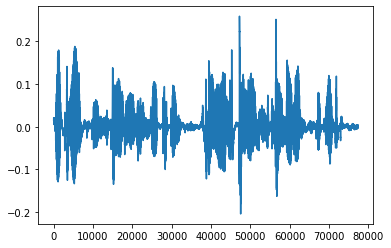

In [223]:
waveform, _ = torchaudio.load(df.iloc[2].audio, normalization=True)
plt.figure()
plt.plot(waveform.t().numpy())

In [294]:
%%timeit

parse_audio(df.iloc[2].audio, window_size=window_size, window_stride=window_stride)

9.85 ms ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


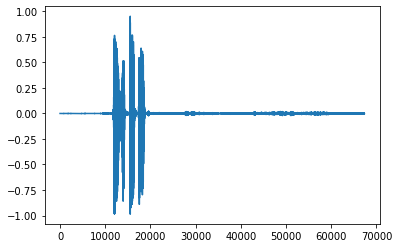

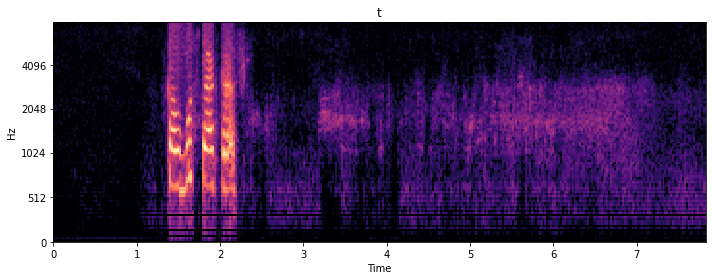

In [270]:
waveform, _ = torchaudio.load(df.iloc[3].audio, normalization=True)
plt.figure()
plt.plot(waveform.t().numpy())
visualize_pt_s(waveform);

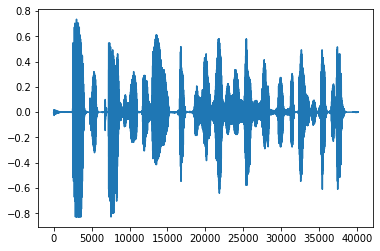

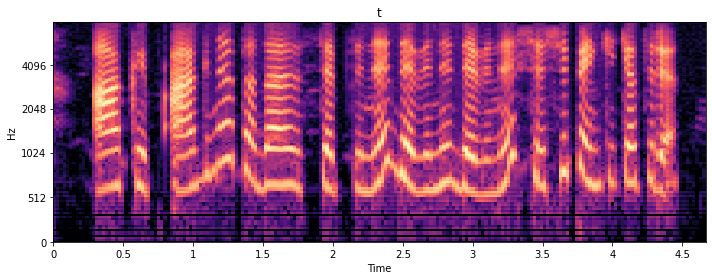

In [214]:
waveform, _ = torchaudio.load(test_df.iloc[21].audio, normalization=True)
plt.figure()
plt.plot(waveform.t().numpy())
visualize_pt_s(waveform);